In [1]:
Get-Runspace


 Id Name            ComputerName    Type          State         Availability
 -- ----            ------------    ----          -----         ------------
  1 Runspace1       localhost       Local         Opened        Busy



In [2]:
$RunSpace   = [runspacefactory]::CreateRunspace()

Get-Runspace


 Id Name            ComputerName    Type          State         Availability
 -- ----            ------------    ----          -----         ------------
  1 Runspace1       localhost       Local         Opened        Busy
  2 Runspace2       localhost       Local         BeforeOpen    None



In [3]:
$RunSpace.Name  = "NewTestRunSpace"

Get-Runspace  


 Id Name            ComputerName    Type          State         Availability
 -- ----            ------------    ----          -----         ------------
  1 Runspace1       localhost       Local         Opened        Busy
  2 NewTestRunSpace localhost       Local         BeforeOpen    None



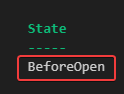

In [4]:
$RunSpace.Open()

Get-Runspace


 Id Name            ComputerName    Type          State         Availability
 -- ----            ------------    ----          -----         ------------
  1 Runspace1       localhost       Local         Opened        Busy
  2 NewTestRunSpace localhost       Local         Opened        Available



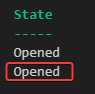

In [5]:
$PowerShellInstance  = [powershell]::Create()
$PowerShellInstance


Commands            : System.Management.Automation.PSCommand
Streams             : System.Management.Automation.PSDataStreams
InstanceId          : 0ebe02ad-5458-46c2-a889-4a0fa9e3233b
InvocationStateInfo : System.Management.Automation.PSInvocationStateInfo
IsNested            : False
HadErrors           : False
Runspace            : System.Management.Automation.Runspaces.LocalRunspace
RunspacePool        : 
IsRunspaceOwner     : True
HistoryString       : 




In [6]:
$PowerShellInstance.Runspace   = $RunSpace

Get-Runspace


 Id Name            ComputerName    Type          State         Availability
 -- ----            ------------    ----          -----         ------------
  1 Runspace1       localhost       Local         Opened        Busy
  2 NewTestRunSpace localhost       Local         Opened        Available



In [7]:
$ScriptBlock = {

    Write-Output "Script block output from the RunSpace"
}

$PowerShellInstance.AddScript($ScriptBlock)


Commands            : System.Management.Automation.PSCommand
Streams             : System.Management.Automation.PSDataStreams
InstanceId          : 0ebe02ad-5458-46c2-a889-4a0fa9e3233b
InvocationStateInfo : System.Management.Automation.PSInvocationStateInfo
IsNested            : False
HadErrors           : False
Runspace            : System.Management.Automation.Runspaces.LocalRunspace
RunspacePool        : 
IsRunspaceOwner     : False
HistoryString       : 




In [8]:
$Script = $PowerShellInstance.InvokeAsync()

$Script


Id IsCompleted Status
-- ----------- ------
1  False       WaitingForActivation



In [9]:
$Script.Result

Script block output from the RunSpace


In [10]:
$Script


Id IsCompleted Status
-- ----------- ------
1  True        RanToCompletion



In [11]:
$RunSpace.Close()

Get-Runspace


 Id Name            ComputerName    Type          State         Availability
 -- ----            ------------    ----          -----         ------------
  1 Runspace1       localhost       Local         Opened        Busy
  2 NewTestRunSpace localhost       Local         Closed        None



In [12]:
$RunSpace.Dispose()

Get-Runspace


 Id Name            ComputerName    Type          State         Availability
 -- ----            ------------    ----          -----         ------------
  1 Runspace1       localhost       Local         Opened        Busy



In [ ]:
# $PowerShellCheck            = [powershell]::Create()
# $PowerShellCheck.Runspace   = $RunSpace
    

# $NewRunSpace = Get-Runspace | Where-Object {$_.Name -eq $RunspaceRefreshMonitor}